<a href="https://colab.research.google.com/github/AnabelleCE/TeneikaAskew_MiniSprint/blob/main/MiniSprint_Project_Capois_Espinal%2C_Anabelle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Teneika Askew MiniSprint via Clicked
https://www.clicked.com/learning-experience-page/decision-modeling-mini-sprint-w-teneika-askew-5-16-24
```




# **Leveraging Historical F1 Data for Optimal Driver Recruitment**

Scenario:
As data analysts at the Fédération Internationale de l'Automobile (FIA), we are tasked with assisting recruitment agencies in identifying top-performing Formula 1 drivers for upcoming seasons. Our goal is to leverage historical data from the FASTF1 and ERGAST APIs to uncover key attributes and performance metrics associated with drivers who consistently achieve top-three finishes in races.

Problem Statement:
In the highly competitive world of Formula 1 racing, selecting drivers with winning attributes is paramount to success. However, with numerous factors influencing race outcomes, it can be challenging for recruitment agencies to identify the most promising talent. Our task is to analyze historical F1 data to identify patterns and characteristics common among drivers who have consistently placed in the top three positions across various races.

Objectives:

    Explore historical F1 data from the FASTF1 and ERGAST APIs, spanning multiple seasons and races.
    Identify key attributes and performance metrics associated with drivers who frequently achieve top-three finishes.
    Develop a machine learning model to predict the likelihood of a driver placing in the top three based on their attributes.
    Provide actionable recommendations to recruitment agencies on which driver attributes to prioritize when making hiring decisions.

Approach:

    Data Collection: Gather comprehensive historical data on F1 races, drivers, circuits, and race results from the FASTF1 and ERGAST APIs.
    Data Analysis: Perform exploratory data analysis (EDA) to understand the distribution and trends of key performance metrics such as lap times, qualifying positions, race positions, etc.
    Feature Engineering: Identify relevant features and engineer new features that may enhance the predictive power of the model.
    Machine Learning Model Development: Build and train a machine learning model using historical data to predict the likelihood of a driver placing in the top three positions.
    Model Evaluation: Evaluate the performance of the model using appropriate metrics and validate its robustness through cross-validation.
    Recommendations: Provide actionable recommendations to recruitment agencies based on the insights derived from the analysis and model predictions.

Expected Outcomes:

    A comprehensive analysis highlighting key attributes and performance metrics associated with top-performing F1 drivers.
    A machine learning model capable of predicting the likelihood of a driver placing in the top three positions based on their attributes.
    Actionable recommendations for recruitment agencies to enhance their decision-making process when selecting drivers for F1 teams.

By leveraging historical F1 data and employing advanced analytics techniques, we aim to provide valuable insights that will support recruitment agencies in identifying and recruiting top-tier talent for the upcoming Formula 1 seasons.

Import relevant libraries

In [ ]:
import numpy as np
import pandas as pd
import datetime
from datetime import date as dt
from datetime import datetime
import time
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen
import json
from tabulate import tabulate
import sqlite3

# **Accessing the API+Library**

Install API library access

In [ ]:
!pip install fastf1

Import necessary libraries from the API library

In [ ]:
# Can refer to the FastF1 documentation https://docs.fastf1.dev/examples/index.html
import fastf1
from fastf1 import plotting
from fastf1 import get_session
from fastf1.core import Laps
from fastf1.ergast import Ergast

# **Extract Data From API**

Pull constructor information

In [ ]:
# Let's look at how Constructor names are labeled
# This will help us know the right name/id to use to pull data
ergast=Ergast()
cons24_info = ergast.get_constructor_info(2024)
cons24_info.head(10)

req         WARNING 	DEFAULT CACHE ENABLED! (1.32 MB) /root/.cache/fastf1


,constructorId,constructorUrl,constructorName,constructorNationality
0,alpine,http://en.wikipedia.org/wiki/Alpine_F1_Team,Alpine F1 Team,French
1,aston_martin,http://en.wikipedia.org/wiki/Aston_Martin_in_F...,Aston Martin,British
2,ferrari,http://en.wikipedia.org/wiki/Scuderia_Ferrari,Ferrari,Italian
3,haas,http://en.wikipedia.org/wiki/Haas_F1_Team,Haas F1 Team,American
4,mclaren,http://en.wikipedia.org/wiki/McLaren,McLaren,British
5,mercedes,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...,Mercedes,German
6,rb,http://en.wikipedia.org/wiki/RB_Formula_One_Team,RB F1 Team,Italian
7,red_bull,http://en.wikipedia.org/wiki/Red_Bull_Racing,Red Bull,Austrian
8,sauber,http://en.wikipedia.org/wiki/Sauber_Motorsport,Sauber,Swiss
9,williams,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Williams,British


Let's look at historical race data and include dirver age

In [ ]:
# Pull historical driver data, adding a column calculatimg the driver age during that season
hst_driver_data = []
hst_ages = []

# Iterate over the range of years
for year in range(1950, 2025):
    # Fetch driver information for the current year
    hst_driver_info = ergast.get_driver_info(season=year)

    # Calculate age based on date of birth for the current year
    hst_driver_info['dateOfBirth'] = pd.to_datetime(hst_driver_info['dateOfBirth'])
    hst_driver_info['hst_age'] = year - hst_driver_info['dateOfBirth'].dt.year

    # Append the DataFrame to the list
    hst_driver_data.append(hst_driver_info)

    # Append the ages to the list
    hst_ages.extend(hst_driver_info['hst_age'].tolist())

# Concatenate all driver data into a single DataFrame
hst_ages_df = pd.concat(hst_driver_data)
hst_ages_df.reset_index(drop=True, inplace=True)
hst_ages_df

,driverId,driverUrl,givenName,familyName,dateOfBirth,driverNationality,hst_age,driverCode,driverNumber
0,ader,http://en.wikipedia.org/wiki/Walt_Ader,Walt,Ader,1913-12-15,American,37,NaN,NaN
1,agabashian,http://en.wikipedia.org/wiki/Fred_Agabashian,Fred,Agabashian,1913-08-21,American,37,NaN,NaN
2,ascari,http://en.wikipedia.org/wiki/Alberto_Ascari,Alberto,Ascari,1918-07-13,Italian,32,NaN,NaN
3,banks,http://en.wikipedia.org/wiki/Henry_Banks,Henry,Banks,1913-06-14,American,37,NaN,NaN
4,bettenhausen,http://en.wikipedia.org/wiki/Tony_Bettenhausen,Tony,Bettenhausen,1916-09-12,American,34,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2069,sargeant,http://en.wikipedia.org/wiki/Logan_Sargeant,Logan,Sargeant,2000-12-31,American,24,SAR,2.0
2070,stroll,http://en.wikipedia.org/wiki/Lance_Stroll,Lance,Stroll,1998-10-29,Canadian,26,STR,18.0
2071,tsunoda,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki,Tsunoda,2000-05-11,Japanese,24,TSU,22.0
2072,max_verstappen,http://en.wikipedia.org/wiki/Max_Verstappen,Max,Verstappen,1997-09-30,Dutch,27,VER,33.0


# **Exploratory Data Analysis (EDA) w/ Feature Engineering + Visualization**

What is the historical average age?

In [ ]:
# Calculate the mean age for all years
hst_avg_age = sum(hst_ages) / len(hst_ages)

# Print the mean age for all years and for each individual year
print("\033[1m" +'Average Historical Driver Age:'+ "\033[0m", "\033[32m"+ str(hst_avg_age) +"\033[0m")

Average Historical Driver Age: 30.60125361620058


What is the average age for each season (year)?

In [ ]:
# Let's calculate the average driver age for each season
yr_avg_age = []
for year in range(1950, 2025):
    # Fetch driver information for the current year
    hst_driver_info = ergast.get_driver_info(season=year)

    # Calculate age based on date of birth for the current year
    hst_driver_info['dateOfBirth'] = pd.to_datetime(hst_driver_info['dateOfBirth'])
    hst_driver_info['hst_age'] = year - hst_driver_info['dateOfBirth'].dt.year

    sn_avg_age = hst_driver_info['hst_age'].mean()
    # Append the result to the list of mean ages for each season
    yr_avg_age.append({'Season':year, 'Mean Age': sn_avg_age})

# Convert the list of dictionaries to a DataFrame
yr_avg_age_df = pd.DataFrame(yr_avg_age)

# Print the mean age for each individual season within the specified range
print("\033[1m" +'Average Driver Age by Season:'+ "\033[0m")
yr_avg_age_df

Average Driver Age by Season:


,Season,Mean Age
0,1950,38.933333
1,1951,39.166667
2,1952,37.266667
3,1953,35.100000
4,1954,34.266667
...,...,...
70,2020,27.478261
71,2021,28.380952
72,2022,28.409091
73,2023,28.409091


Let's visualize the average age by season:

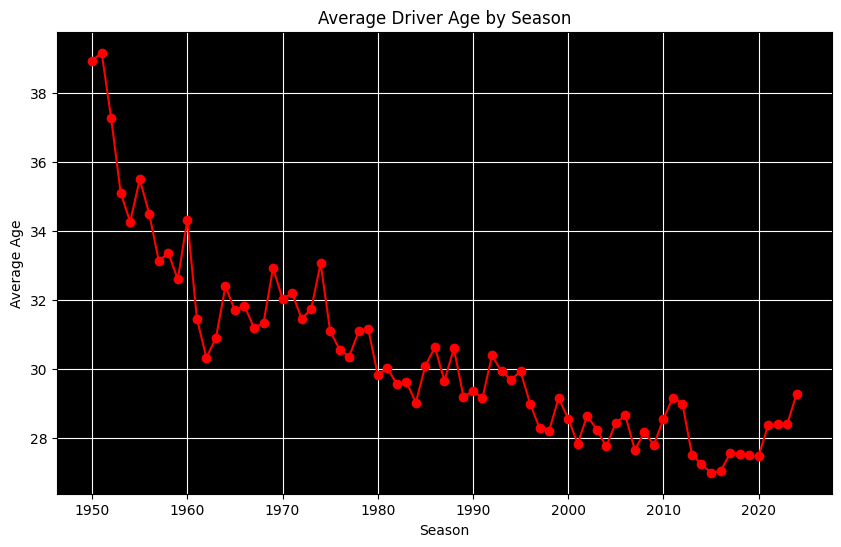

In [ ]:
# Plot the average age for each season
plt.figure(figsize=(10, 6))
plt.plot(yr_avg_age_df['Season'], yr_avg_age_df['Mean Age'], marker='o', linestyle='-', color='red')  # Set color to red
plt.title('Average Driver Age by Season', color='black')  # Set title color to black
plt.xlabel('Season', color='black')  # Set x-axis label color to black
plt.ylabel('Average Age', color='black')  # Set y-axis label color to black
plt.grid(True, color='white')  # Set grid color to white
plt.xticks(range(1950, 2025, 10), color='black')  # Adjust the ticks for better readability and set color to white
plt.yticks(color='black')  # Set y-axis ticks color to black
plt.gca().set_facecolor('black')  # Set background color to black
plt.show()

# The result shows us an overall downward trend
# In most recent years the average age of drivers is typically below 30

Zoom in on the last five years:

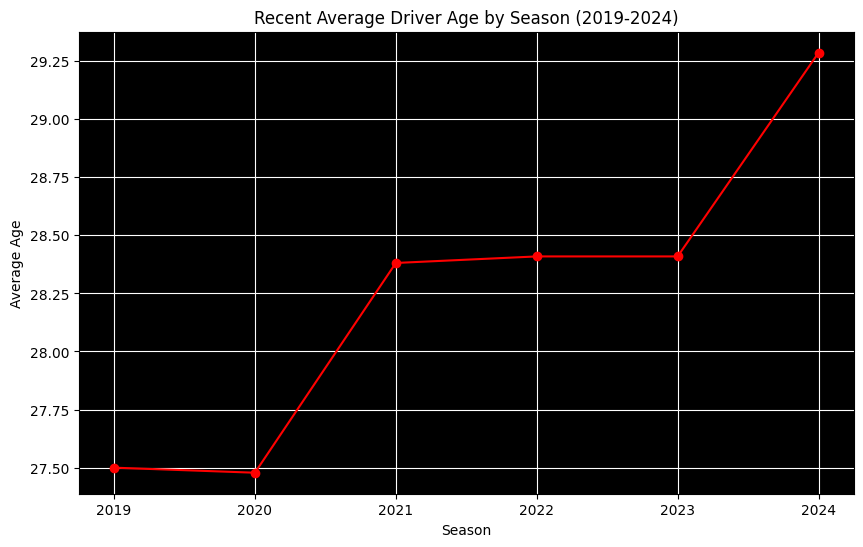

In [ ]:
# set the season to greater than or equal to 2019
recent_age=yr_avg_age_df[yr_avg_age_df['Season']>=2019]

# Plot the average age for the last five years/seasons
plt.figure(figsize=(10, 6))
plt.plot(recent_age['Season'], recent_age['Mean Age'], marker='o', linestyle='-', color='red')
plt.title('Recent Average Driver Age by Season (2019-2024)', color='black')
plt.xlabel('Season', color='black')
plt.ylabel('Average Age', color='black')
plt.grid(True, color='white')
plt.xticks(range(2019, 2025, 1), color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('black')
plt.show()

#In the last five years there is an upward trend in the average age, but still below 30

How many seasons did the drivers have under their belt by the time of their latest season?

In [ ]:
# Initialize an empty list to store results
results = []

# Iterate over the range of seasons
for season in range(1950, 2025):
    # Fetch driver information for the each season
    hst_driver_info = ergast.get_driver_info(season=season)

    # Group by driver to find their first and last appearance in the current season
    first_appearance = hst_driver_info.groupby('driverId').nth(0).reset_index()
    last_appearance = hst_driver_info.groupby('driverId').nth(-1).reset_index()

    # Calculate the number of seasons for each driver in the current season
    first_season = pd.DataFrame({'DriverID': first_appearance['driverId'], 'FirstSeason': season})
    last_season = pd.DataFrame({'DriverID': last_appearance['driverId'], 'LastSeason': season})

    # Merge first and last appearance to calculate the number of seasons
    merged = pd.merge(first_season, last_season, on='DriverID', how='outer')
    merged['NumberOfSeasons'] = merged['LastSeason'] - merged['FirstSeason'] + 1

    # Append the results for the current season to the list
    results.append(merged)

# Concatenate the results into a single DataFrame
driver_exp = pd.concat(results, ignore_index=True)

# Group by DriverID to get the first and last seasons
driver_exp = driver_exp.groupby('DriverID').agg({'FirstSeason':'min', 'LastSeason':'max', 'NumberOfSeasons':'sum'}).reset_index()

# Sort the DataFrame by the 'LastSeason' column
driver_exp_sorted = driver_exp.sort_values(by='LastSeason').reset_index(drop=True)

# Display the sorted table
driver_exp_sorted

,DriverID,FirstSeason,LastSeason,NumberOfSeasons
0,chitwood,1950,1950,1
1,crossley,1950,1950,1
2,fohr,1950,1950,1
3,ader,1950,1950,1
4,cantrell,1950,1950,1
...,...,...,...,...
541,zhou,2022,2024,3
542,stroll,2017,2024,8
543,bottas,2013,2024,12
544,russell,2019,2024,6


Generate some descriptive statistics on driver exeprience:

In [ ]:
# Calculate the average number of seasons
average_exp = driver_exp_sorted['NumberOfSeasons'].mean()

# Print the result, adding color and bolding for better presentation
print("\033[1m" +'Average Historical Driver Season Participation:'+ "\033[0m", "\033[32m"+ str(average_exp) +"\033[0m")

#Calculate the maximum number of seasons
mode_exp = driver_exp['NumberOfSeasons'].mode().iloc[0]
print("\033[1m" +'Mode Historical Driver Season Participation:'+ "\033[0m", "\033[32m"+ str(mode_exp) +"\033[0m")

#Calculate the minimum number of seasons
min_exp = driver_exp['NumberOfSeasons'].min()
print("\033[1m" +'Minimum Historical Driver Season Participation:'+ "\033[0m", "\033[32m"+ str(min_exp) +"\033[0m")

#Calculate the maximum number of seasons
max_exp = driver_exp['NumberOfSeasons'].max()
print("\033[1m" +'Maximum Historical Driver Season Participation:'+ "\033[0m", "\033[32m"+ str(max_exp) +"\033[0m")

Average Historical Driver Season Participation: 3.7985347985347984
Mode Historical Driver Season Participation: 1
Minimum Historical Driver Season Participation: 1
Maximum Historical Driver Season Participation: 21


What is the average experience by season?

In [ ]:
# Group by LastSeason and calculate the average NumberOfSeasons
avg_seasons = driver_exp_sorted.groupby('LastSeason')['NumberOfSeasons'].mean().reset_index()

# Display the table
avg_seasons

,LastSeason,NumberOfSeasons
0,1950,1.000000
1,1951,1.625000
2,1952,1.636364
3,1953,1.900000
4,1954,2.000000
...,...,...
69,2020,4.500000
70,2021,7.750000
71,2022,7.000000
72,2023,1.500000


Descriptive statistics for average experience by Season:

In [ ]:
# Calculate descriptive statistics for NumberOfSeasons
avg_seasons_stats = avg_seasons['NumberOfSeasons'].describe()

# Display descriptive statistics for NumberOfSeasons
avg_seasons_stats

count    74.000000
mean      3.885096
std       1.896972
min       1.000000
25%       2.500000
50%       3.464286
75%       4.846429
max       9.000000
Name: NumberOfSeasons, dtype: float64

Visualize average experience by Season:

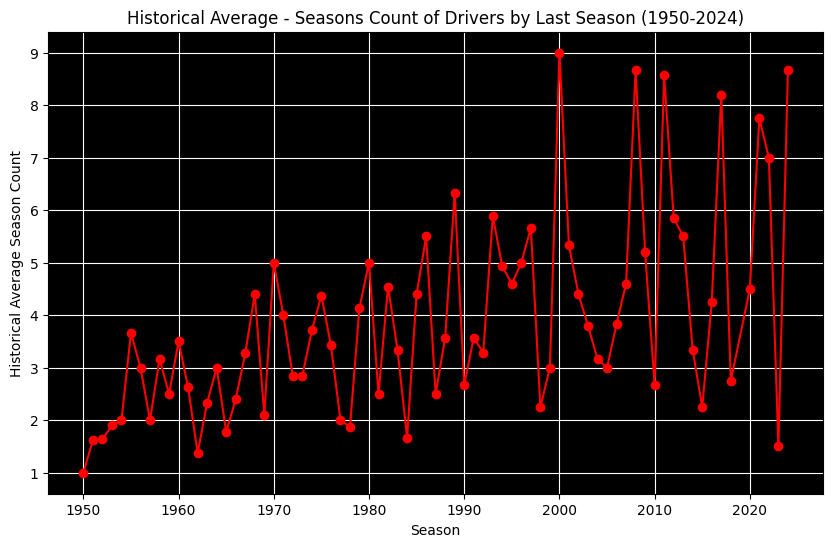

In [ ]:
# Plot the average season count of driver by season
plt.figure(figsize=(10, 6))
plt.plot(avg_seasons['LastSeason'], avg_seasons['NumberOfSeasons'], marker='o', linestyle='-', color='red')  # Set color to red
plt.title('Historical Average - Seasons Count of Drivers by Last Season (1950-2024)', color='black')  # Set title color to white
plt.xlabel('Season', color='black')  # Set x-axis label color to white
plt.ylabel('Historical Average Season Count', color='black')  # Set y-axis label color to white
plt.grid(True, color='white')  # Set grid color to white
plt.xticks(range(1950, 2025, 10), color='black')  # Adjust the ticks for better readability and set color to white
plt.yticks(color='black')  # Set y-axis ticks color to white
plt.gca().set_facecolor('black')  # Set background color to black
plt.show()

#Overall there appears to be an upward trend in experience
#despite the drivers getting younger, they have more seasons under their belt
#Makes sense that closer to the start of the sport drivers had less exprience

Zoom in on the last five years/seasons:

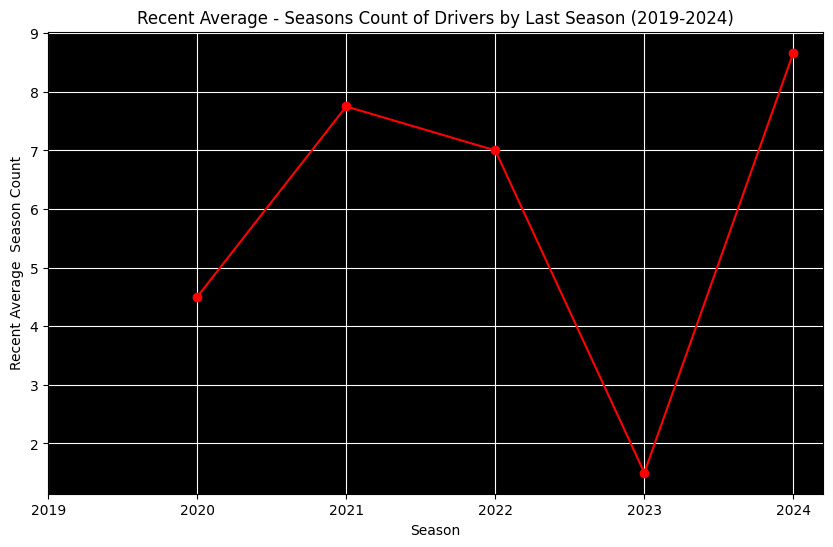

In [ ]:
recent_exp=avg_seasons[avg_seasons['LastSeason']>=2019]

# Plot the recent average race experince by season
plt.figure(figsize=(10, 6))
plt.plot(recent_exp['LastSeason'], recent_exp['NumberOfSeasons'], marker='o', linestyle='-', color='red')
plt.title('Recent Average - Seasons Count of Drivers by Last Season (2019-2024)', color='black')
plt.xlabel('Season', color='black')
plt.ylabel('Recent Average  Season Count', color='black')
plt.grid(True, color='white')
plt.xticks(range(2019, 2025, 1), color='black')
plt.yticks(color='black')
plt.gca().set_facecolor('black')
plt.show()

# It's interesting to see that in 2019, based on this data, there were no drivers ending their season
# A web search appears to show that some drivers did announce their last season that year
# However, they may still be driving as a reserve and their name has appeared in more recent years

# **Pull Results from Races in the API**

Get all race data for all F1 seasons

In [ ]:
# Fetch all race data available, Ergast provides data starting in 1950
# Seaons List: http://ergast.com/api/f1/seasons
# May run into the error "RateLimitExceededError: ergast.com: 200 calls/h"
# You will have to restart the session and run all
hst_years = range(1950, 2025)
hst_results = []
for year in hst_years:
    all_results = ergast.get_race_results(year)
    hst_data=all_results.content
    hst_results_df = pd.concat(hst_data)
    hst_results.append(hst_results_df)

historical =  pd.concat(hst_results)
historical.reset_index(drop=True, inplace=True)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
historical

DEBUG:fastf1.ergast:Failed to parse timestamp '66.004' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '67.100' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '85.692' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '86.713' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '88.864' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '65.704' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '66.561' in Ergastresponse.


,number,position,positionText,points,grid,laps,status,driverId,driverUrl,givenName,...,constructorNationality,totalRaceTimeMillis,totalRaceTime,driverCode,driverNumber,fastestLapRank,fastestLapNumber,fastestLapTime,fastestLapAvgSpeedUnits,fastestLapAvgSpeed
0,2,1,1,9.0,1,70,Finished,farina,http://en.wikipedia.org/wiki/Nino_Farina,Nino,...,Swiss,8003600.0,0 days 02:13:23.600000,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,3,2,2,6.0,2,70,Finished,fagioli,http://en.wikipedia.org/wiki/Luigi_Fagioli,Luigi,...,Swiss,8006200.0,0 days 00:00:02.600000,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,4,3,3,4.0,4,70,Finished,reg_parnell,http://en.wikipedia.org/wiki/Reg_Parnell,Reg,...,Swiss,8055600.0,0 days 00:00:52,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,14,4,4,3.0,6,68,+2 Laps,cabantous,http://en.wikipedia.org/wiki/Yves_Giraud_Caban...,Yves,...,French,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,15,5,5,2.0,9,68,+2 Laps,rosier,http://en.wikipedia.org/wiki/Louis_Rosier,Louis,...,French,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,63,6,6,8.0,7,50,Finished,russell,http://en.wikipedia.org/wiki/George_Russell_(r...,George,...,German,4883209.0,0 days 00:00:39.936000,RUS,63.0,7.0,42.0,0 days 00:01:32.254000,kph,240.926
2246,38,7,7,6.0,11,50,Finished,bearman,http://en.wikipedia.org/wiki/Oliver_Bearman,Oliver,...,Italian,4885952.0,0 days 00:00:42.679000,BEA,38.0,5.0,50.0,0 days 00:01:32.186000,kph,241.103
2247,4,8,8,4.0,6,50,Finished,norris,http://en.wikipedia.org/wiki/Lando_Norris,Lando,...,British,4888981.0,0 days 00:00:45.708000,NOR,4.0,4.0,1.0,0 days 00:01:31.944000,kph,241.738
2248,44,9,9,2.0,8,50,Finished,hamilton,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis,...,German,4890664.0,0 days 00:00:47.391000,HAM,44.0,2.0,38.0,0 days 00:01:31.746000,kph,242.260


Now filter the historical data by just those that "Finished" the race

In [ ]:
#Filter by finished races
hst_finished = historical[(historical['status'] == 'Finished')]
#let's use more high quality data by dropping any of the races that don't have all column data
hst_finished = hst_finished.dropna()
hst_finished.reset_index(drop=True, inplace=True)
hst_finished

,number,position,positionText,points,grid,laps,status,driverId,driverUrl,givenName,...,constructorNationality,totalRaceTimeMillis,totalRaceTime,driverCode,driverNumber,fastestLapRank,fastestLapNumber,fastestLapTime,fastestLapAvgSpeedUnits,fastestLapAvgSpeed
0,8,3,3,6.0,5,58,Finished,alonso,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,...,French,5090430.0,0 days 00:00:34.673000,ALO,14.0,3.0,10.0,0 days 00:01:25.088000,kph,224.365
1,9,6,6,3.0,4,58,Finished,button,http://en.wikipedia.org/wiki/Jenson_Button,Jenson,...,British,5126355.0,0 days 00:01:10.598000,BUT,22.0,7.0,24.0,0 days 00:01:25.982000,kph,222.032
2,9,3,3,6.0,6,56,Finished,button,http://en.wikipedia.org/wiki/Jenson_Button,Jenson,...,British,5479058.0,0 days 00:00:11.568000,BUT,22.0,3.0,28.0,0 days 00:01:34.967000,kph,210.123
3,8,7,7,2.0,19,56,Finished,alonso,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,...,French,5535367.0,0 days 00:01:07.877000,ALO,14.0,10.0,7.0,0 days 00:01:35.888000,kph,208.105
4,5,3,3,6.0,13,57,Finished,alonso,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,...,French,5064048.0,0 days 00:00:06.712000,ALO,14.0,1.0,24.0,0 days 00:01:25.683000,kph,222.807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,63,6,6,8.0,7,50,Finished,russell,http://en.wikipedia.org/wiki/George_Russell_(r...,George,...,German,4883209.0,0 days 00:00:39.936000,RUS,63.0,7.0,42.0,0 days 00:01:32.254000,kph,240.926
291,38,7,7,6.0,11,50,Finished,bearman,http://en.wikipedia.org/wiki/Oliver_Bearman,Oliver,...,Italian,4885952.0,0 days 00:00:42.679000,BEA,38.0,5.0,50.0,0 days 00:01:32.186000,kph,241.103
292,4,8,8,4.0,6,50,Finished,norris,http://en.wikipedia.org/wiki/Lando_Norris,Lando,...,British,4888981.0,0 days 00:00:45.708000,NOR,4.0,4.0,1.0,0 days 00:01:31.944000,kph,241.738
293,44,9,9,2.0,8,50,Finished,hamilton,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis,...,German,4890664.0,0 days 00:00:47.391000,HAM,44.0,2.0,38.0,0 days 00:01:31.746000,kph,242.260


Filter historical data further by only those finished in the top three:

In [ ]:
hst_finished_top3 = hst_finished[hst_finished['position'] <= 3]
hst_finished_top3.reset_index(drop=True, inplace=True)
hst_finished_top3

,number,position,positionText,points,grid,laps,status,driverId,driverUrl,givenName,...,constructorNationality,totalRaceTimeMillis,totalRaceTime,driverCode,driverNumber,fastestLapRank,fastestLapNumber,fastestLapTime,fastestLapAvgSpeedUnits,fastestLapAvgSpeed
0,8,3,3,6.0,5,58,Finished,alonso,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,...,French,5090430.0,0 days 00:00:34.673000,ALO,14.0,3.0,10.0,0 days 00:01:25.088000,kph,224.365
1,9,3,3,6.0,6,56,Finished,button,http://en.wikipedia.org/wiki/Jenson_Button,Jenson,...,British,5479058.0,0 days 00:00:11.568000,BUT,22.0,3.0,28.0,0 days 00:01:34.967000,kph,210.123
2,5,3,3,6.0,13,57,Finished,alonso,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,...,French,5064048.0,0 days 00:00:06.712000,ALO,14.0,1.0,24.0,0 days 00:01:25.683000,kph,222.807
3,5,1,1,10.0,1,56,Finished,alonso,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,...,French,5493736.0,0 days 01:31:33.736000,ALO,14.0,4.0,18.0,0 days 00:01:35.899000,kph,208.081
4,1,1,1,10.0,4,57,Finished,alonso,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando,...,French,5386205.0,0 days 01:29:46.205000,ALO,14.0,3.0,21.0,0 days 00:01:32.534000,kph,210.551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,11,2,2,18.0,5,57,Finished,perez,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio,...,Austrian,5527199.0,0 days 00:00:22.457000,PER,11.0,4.0,40.0,0 days 00:01:34.364000,kph,206.468
103,55,3,3,15.0,4,57,Finished,sainz,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,Carlos,...,Italian,5529852.0,0 days 00:00:25.110000,SAI,55.0,6.0,44.0,0 days 00:01:34.507000,kph,206.156
104,1,1,1,25.0,1,50,Finished,max_verstappen,http://en.wikipedia.org/wiki/Max_Verstappen,Max,...,Austrian,4843273.0,0 days 01:20:43.273000,VER,33.0,3.0,50.0,0 days 00:01:31.773000,kph,242.188
105,11,2,2,18.0,3,50,Finished,perez,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio,...,Austrian,4862704.0,0 days 00:00:13.643100,PER,11.0,8.0,37.0,0 days 00:01:32.273000,kph,240.876


Pull just the recent year data, adding both age of driver and years of experience:

In [ ]:
# Fetch recent race results from the last 5 years
recent_years = range(2019, 2025)
recent_results = []

for year in recent_years:
    all_recent = ergast.get_race_results(year)
    recent_data = all_recent.content
    recent_results_df = pd.concat(recent_data)
    # Add a new column 'race_year' to store the year of each race based on the 'season' parameter
    recent_results_df['race_year'] = year
    recent_results.append(recent_results_df)

# Concatenate all the recent results
recent = pd.concat(recent_results)
recent.reset_index(drop=True, inplace=True)

# Merge recent race results with driver_exp_sorted to get FirstSeason for each driver
recent = recent.merge(driver_exp_sorted[['DriverID', 'FirstSeason']], left_on='driverId', right_on='DriverID', how='left')

# Function to calculate the number of seasons by the time of each race
def calculate_seasons(row):
    first_season = row['FirstSeason']
    race_year = row['race_year']
    return race_year - first_season + 1

# Apply the function to calculate the number of seasons
recent['seasons_since_debut'] = recent.apply(calculate_seasons, axis=1)

# Calculate the age based on date of birth and season of race
recent['dateOfBirth'] = pd.to_datetime(recent['dateOfBirth'])
recent['age_in_season'] = recent['race_year'] - recent['dateOfBirth'].dt.year

# Reorder columns for better orgnaization of information
columns_order = ['status', 'position', 'positionText', 'points', 'totalRaceTime', 'totalRaceTimeMillis', 'grid', 'laps',
                 'fastestLapTime', 'fastestLapAvgSpeed', 'fastestLapRank', 'fastestLapAvgSpeedUnits', 'fastestLapNumber',
                 'driverId', 'number', 'driverNumber', 'driverCode', 'givenName', 'familyName', 'driverNationality',
                 'dateOfBirth', 'age_in_season', 'seasons_since_debut', 'constructorId', 'constructorName', 'constructorNationality',
                 'driverUrl', 'constructorUrl']

recent = recent[columns_order]
recent

DEBUG:fastf1.ergast:Failed to parse timestamp '66.004' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '67.100' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '85.692' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '86.713' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '88.864' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '65.704' in Ergastresponse.
DEBUG:fastf1.ergast:Failed to parse timestamp '66.561' in Ergastresponse.


,status,position,positionText,points,totalRaceTime,totalRaceTimeMillis,grid,laps,fastestLapTime,fastestLapAvgSpeed,...,familyName,driverNationality,dateOfBirth,age_in_season,seasons_since_debut,constructorId,constructorName,constructorNationality,driverUrl,constructorUrl
0,Finished,1,1,26.0,0 days 01:25:27.325000,5127325.0,2,58,0 days 00:01:25.580000,223.075,...,Bottas,Finnish,1989-08-28,30,7,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Valtteri_Bottas,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
1,Finished,2,2,18.0,0 days 00:00:20.886000,5148211.0,1,58,0 days 00:01:26.057000,221.839,...,Hamilton,British,1985-01-07,34,13,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Lewis_Hamilton,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
2,Finished,3,3,15.0,0 days 00:00:22.520000,5149845.0,4,58,0 days 00:01:26.256000,221.327,...,Verstappen,Dutch,1997-09-30,22,5,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Max_Verstappen,http://en.wikipedia.org/wiki/Red_Bull_Racing
3,Finished,4,4,12.0,0 days 00:00:57.109000,5184434.0,3,58,0 days 00:01:27.954000,217.054,...,Vettel,German,1987-07-03,32,13,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Sebastian_Vettel,http://en.wikipedia.org/wiki/Scuderia_Ferrari
4,Finished,5,5,10.0,0 days 00:00:58.203000,5185528.0,5,58,0 days 00:01:26.926000,219.621,...,Leclerc,Monegasque,1997-10-16,22,2,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Charles_Leclerc,http://en.wikipedia.org/wiki/Scuderia_Ferrari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Finished,6,6,8.0,0 days 00:00:39.936000,4883209.0,7,50,0 days 00:01:32.254000,240.926,...,Russell,British,1998-02-15,26,6,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/George_Russell_(r...,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
176,Finished,7,7,6.0,0 days 00:00:42.679000,4885952.0,11,50,0 days 00:01:32.186000,241.103,...,Bearman,British,2005-05-08,19,1,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Oliver_Bearman,http://en.wikipedia.org/wiki/Scuderia_Ferrari
177,Finished,8,8,4.0,0 days 00:00:45.708000,4888981.0,6,50,0 days 00:01:31.944000,241.738,...,Norris,British,1999-11-13,25,6,mclaren,McLaren,British,http://en.wikipedia.org/wiki/Lando_Norris,http://en.wikipedia.org/wiki/McLaren
178,Finished,9,9,2.0,0 days 00:00:47.391000,4890664.0,8,50,0 days 00:01:31.746000,242.260,...,Hamilton,British,1985-01-07,39,18,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Lewis_Hamilton,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...


Let's narrow the recent data further by just looking at those that placed among the top 3:

In [ ]:
recent_finished_top3 = recent[recent['position'] <= 3]
recent_finished_top3.reset_index(drop=True, inplace=True)
recent_finished_top3

,status,position,positionText,points,totalRaceTime,totalRaceTimeMillis,grid,laps,fastestLapTime,fastestLapAvgSpeed,...,familyName,driverNationality,dateOfBirth,age_in_season,seasons_since_debut,constructorId,constructorName,constructorNationality,driverUrl,constructorUrl
0,Finished,1,1,26.0,0 days 01:25:27.325000,5127325.0,2,58,0 days 00:01:25.580000,223.075,...,Bottas,Finnish,1989-08-28,30,7,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Valtteri_Bottas,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
1,Finished,2,2,18.0,0 days 00:00:20.886000,5148211.0,1,58,0 days 00:01:26.057000,221.839,...,Hamilton,British,1985-01-07,34,13,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Lewis_Hamilton,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
2,Finished,3,3,15.0,0 days 00:00:22.520000,5149845.0,4,58,0 days 00:01:26.256000,221.327,...,Verstappen,Dutch,1997-09-30,22,5,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Max_Verstappen,http://en.wikipedia.org/wiki/Red_Bull_Racing
3,Finished,1,1,25.0,0 days 01:34:21.295000,5661295.0,3,57,0 days 00:01:33.528000,208.314,...,Hamilton,British,1985-01-07,34,13,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Lewis_Hamilton,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
4,Finished,2,2,18.0,0 days 00:00:02.980000,5664275.0,4,57,0 days 00:01:34.209000,206.808,...,Bottas,Finnish,1989-08-28,30,7,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Valtteri_Bottas,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
5,Finished,3,3,16.0,0 days 00:00:06.131000,5667426.0,1,57,0 days 00:01:33.411000,208.575,...,Leclerc,Monegasque,1997-10-16,22,2,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Charles_Leclerc,http://en.wikipedia.org/wiki/Scuderia_Ferrari
6,Finished,1,1,25.0,0 days 01:30:55.739000,5455739.0,1,71,0 days 00:01:07.657000,229.758,...,Bottas,Finnish,1989-08-28,31,8,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Valtteri_Bottas,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...
7,Finished,2,2,18.0,0 days 00:00:02.700000,5458439.0,7,71,0 days 00:01:07.901000,228.933,...,Leclerc,Monegasque,1997-10-16,23,3,ferrari,Ferrari,Italian,http://en.wikipedia.org/wiki/Charles_Leclerc,http://en.wikipedia.org/wiki/Scuderia_Ferrari
8,Finished,3,3,16.0,0 days 00:00:05.491000,5461230.0,3,71,0 days 00:01:07.475000,230.378,...,Norris,British,1999-11-13,21,2,mclaren,McLaren,British,http://en.wikipedia.org/wiki/Lando_Norris,http://en.wikipedia.org/wiki/McLaren
9,Finished,1,1,25.0,0 days 01:22:50.683000,4970683.0,1,71,0 days 00:01:06.719000,232.989,...,Hamilton,British,1985-01-07,35,14,mercedes,Mercedes,German,http://en.wikipedia.org/wiki/Lewis_Hamilton,http://en.wikipedia.org/wiki/Mercedes-Benz_in_...


# **Some more EDA with Visualizations of "Finished" races**

What are the top nationalities historically?

In [ ]:
# Count the occurrences of each country in the 'countries' column
dr_nat_finished = hst_finished['driverNationality'].value_counts()

# Create a DataFrame from the value counts
dr_nat_finished_df = pd.DataFrame(dr_nat_finished).reset_index()

# Rename the columns for clarity
dr_nat_finished_df.columns = ['Nationality', 'Count']

# Display the table
dr_nat_finished_df

,Nationality,Count
0,British,66
1,German,43
2,Spanish,36
3,Finnish,32
4,French,19
5,Brazilian,18
6,Dutch,16
7,Mexican,15
8,Monegasque,11
9,Australian,10


Let's visualize the historical nationality of race finishers:

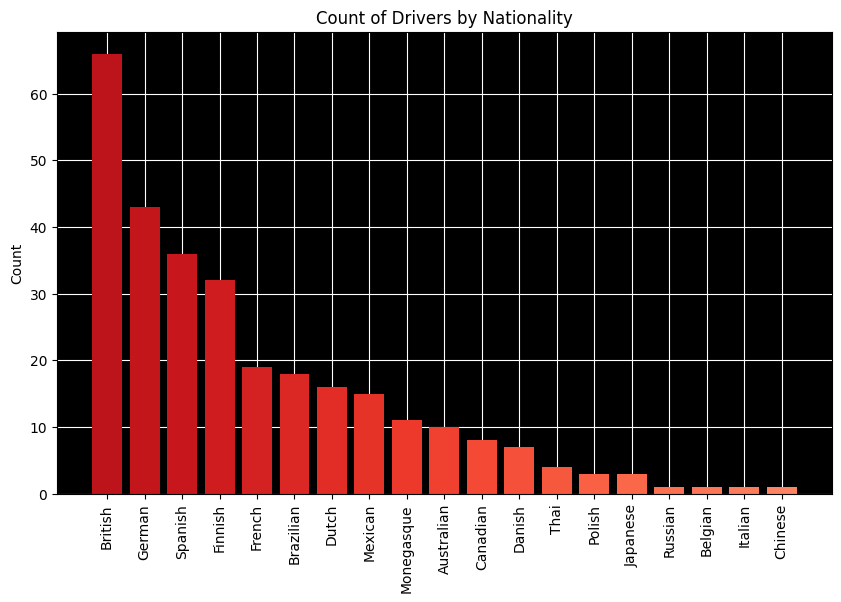

In [ ]:
# Define darker shades of red for the bars
colors = plt.cm.Reds_r([0.2 + 0.4*i/len(dr_nat_finished_df) for i in range(len(dr_nat_finished_df))])

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the bars
plt.bar(dr_nat_finished_df['Nationality'], dr_nat_finished_df['Count'], color=colors)

# Set background color
plt.gca().set_facecolor('black')

# Set axis text color
plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')

# Set title color
plt.title('Count of Drivers by Nationality', color='black')

# Label the y-axis
plt.ylabel('Count')

# Show grid lines behind the bars
plt.grid(color='white')

# Ensure grid lines are behind the bars
plt.gca().set_axisbelow(True)

# Show plot
plt.xticks(rotation=90)
plt.show()

What is the nationality of top 3 finishers?

In [ ]:
# Count the occurrences of each country in the 'countries' column
top_nat_finished = hst_finished_top3['driverNationality'].value_counts()

# Create a DataFrame from the value counts
top_nat_finished_df = pd.DataFrame(top_nat_finished).reset_index()

# Rename the columns for clarity
top_nat_finished_df.columns = ['Nationality', 'Count']

# Display the table
top_nat_finished_df

,Nationality,Count
0,British,33
1,German,20
2,Spanish,15
3,Finnish,14
4,Dutch,10
5,Mexican,5
6,Monegasque,5
7,Polish,2
8,Brazilian,2
9,Danish,1


Visualize the nationalities of the top three finishers:

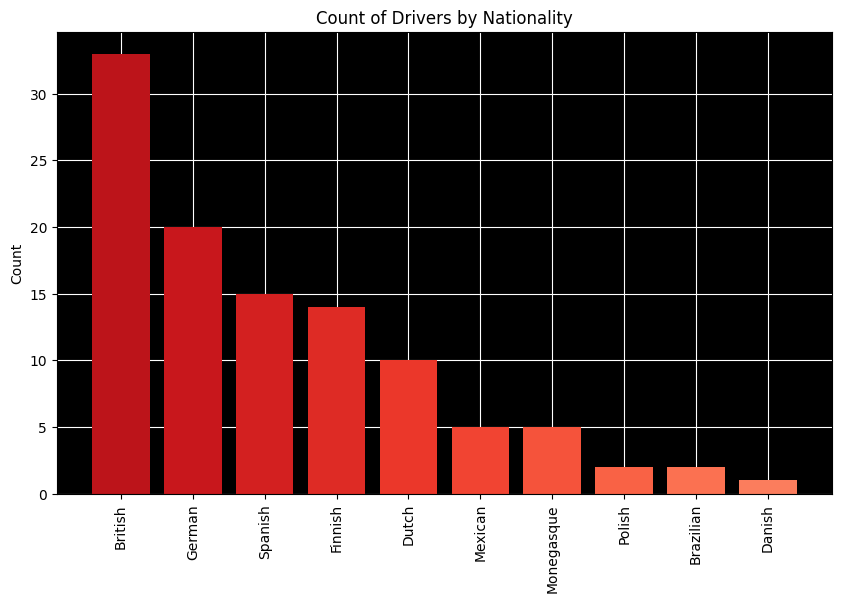

In [ ]:
colors = plt.cm.Reds_r([0.2 + 0.4*i/len(top_nat_finished_df) for i in range(len(top_nat_finished_df))])

plt.figure(figsize=(10, 6))

plt.bar(top_nat_finished_df['Nationality'], top_nat_finished_df['Count'], color=colors)

plt.gca().set_facecolor('black')

plt.gca().tick_params(axis='x', colors='black')
plt.gca().tick_params(axis='y', colors='black')

plt.title('Count of Drivers by Nationality', color='black')

plt.ylabel('Count')

plt.grid(color='white')

plt.gca().set_axisbelow(True)

plt.xticks(rotation=90)
plt.show()

# **What caused drivers not to finish the race?**

What are the historic reasons for not finishing the race?

In [ ]:
hst_not_finished = historical[~(historical['status'].str.contains('\+') | (historical['status'] == 'Finished'))]
hst_not_finished.reset_index(drop=True, inplace=True)
hst_not_finished

,number,position,positionText,points,grid,laps,status,driverId,driverUrl,givenName,...,constructorNationality,totalRaceTimeMillis,totalRaceTime,driverCode,driverNumber,fastestLapRank,fastestLapNumber,fastestLapTime,fastestLapAvgSpeedUnits,fastestLapAvgSpeed
0,1,12,R,0.0,3,62,Oil leak,fangio,http://en.wikipedia.org/wiki/Juan_Manuel_Fangio,Juan,...,Swiss,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,23,13,N,0.0,19,57,Not classified,kelly,http://en.wikipedia.org/wiki/Joe_Kelly_(Formul...,Joe,...,British,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,21,14,R,0.0,5,49,Out of fuel,bira,http://en.wikipedia.org/wiki/Prince_Bira,Prince,...,Italian,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,5,15,R,0.0,18,44,Engine,murray,http://en.wikipedia.org/wiki/David_Murray_(dri...,David,...,Italian,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,24,16,R,0.0,17,43,Transmission,crossley,http://en.wikipedia.org/wiki/Geoff_Crossley,Geoff,...,British,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1,19,19,0.0,2,54,Fuel pressure,max_verstappen,http://en.wikipedia.org/wiki/Max_Verstappen,Max,...,Austrian,NaN,NaT,VER,33.0,2.0,51.0,0 days 00:01:35.440000,kph,204.140
896,10,20,R,0.0,10,44,Power Unit,gasly,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre,...,Italian,NaN,NaT,GAS,10.0,17.0,34.0,0 days 00:01:37.324000,kph,200.189
897,31,18,R,0.0,9,41,Mechanical,ocon,http://en.wikipedia.org/wiki/Esteban_Ocon,Esteban,...,French,NaN,NaT,OCO,31.0,13.0,34.0,0 days 00:01:36.797000,kph,201.278
898,16,19,R,0.0,3,39,Engine,leclerc,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles,...,Italian,NaN,NaT,LEC,16.0,16.0,37.0,0 days 00:01:37.170000,kph,200.506


Visualize the top 5 reasons for historically not finishing the race:

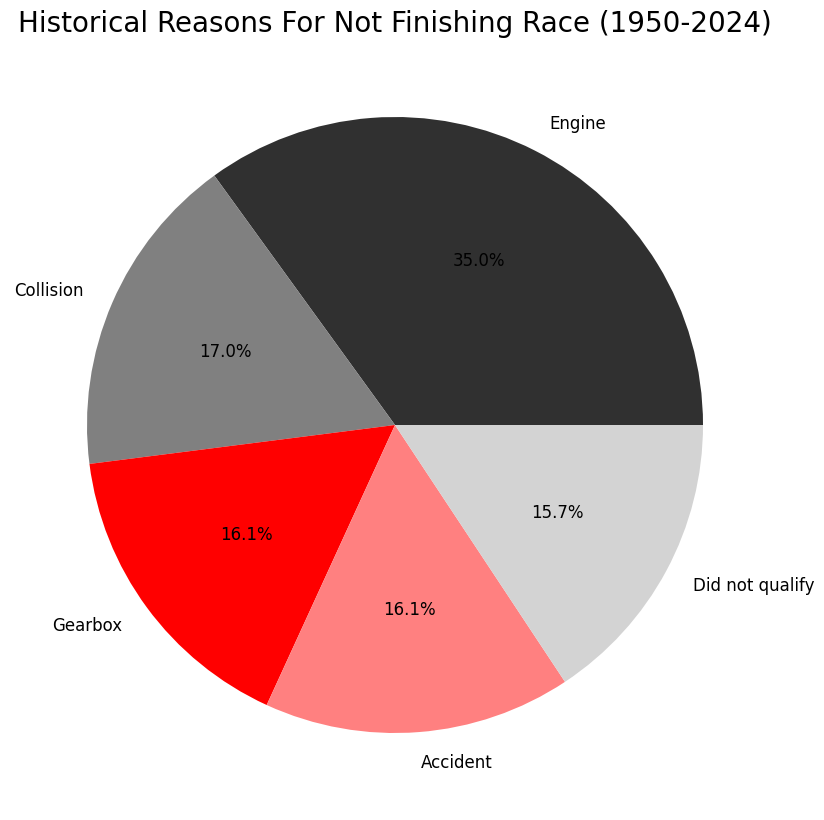

In [ ]:
hst_issues = hst_not_finished['status'].value_counts()
top_hst_issues=hst_issues.head(5)
custom_colors = ['#303030',          # Dark Gray
                 '#808080',          # Gray
                 '#FF0000',          # Red
                 '#FF8080',          # light Red
                 '#D3D3D3']          # light Gray

# Plot the counts as a pie chart with custom colors
plt.figure(figsize=(10, 10))  # Aspect ratio 1:1 for a circular pie chart
top_hst_issues.plot(kind='pie', fontsize=12, autopct='%1.1f%%', colors=custom_colors)  # Increase font size and display percentage values
plt.title('Historical Reasons For Not Finishing Race (1950-2024)', fontsize=20, color='Black')  # Increase title font size and set title color
plt.ylabel('')  # Remove the y-label
plt.show()

# Accidents and collisions are prominent historically, along with engine issues

What are the recent reasons for not finishing the race?

In [ ]:
not_finished = recent[~(recent['status'].str.contains('\+') | (recent['status'] == 'Finished'))]
not_finished.reset_index(drop=True, inplace=True)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
not_finished

,status,position,positionText,points,totalRaceTime,totalRaceTimeMillis,grid,laps,fastestLapTime,fastestLapAvgSpeed,...,familyName,driverNationality,dateOfBirth,age_in_season,seasons_since_debut,constructorId,constructorName,constructorNationality,driverUrl,constructorUrl
0,Wheel,18,R,0.0,NaT,NaN,6,29,0 days 00:01:28.462000,215.807,...,Grosjean,French,1986-04-17,33,11,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Romain_Grosjean,http://en.wikipedia.org/wiki/Haas_F1_Team
1,Damage,19,R,0.0,NaT,NaN,12,28,0 days 00:01:29.848000,212.478,...,Ricciardo,Australian,1989-07-01,30,9,renault,Renault,French,http://en.wikipedia.org/wiki/Daniel_Ricciardo,http://en.wikipedia.org/wiki/Renault_in_Formul...
2,Engine,20,R,0.0,NaT,NaN,18,9,0 days 00:01:30.899000,210.022,...,Sainz,Spanish,1994-09-01,25,5,mclaren,McLaren,British,http://en.wikipedia.org/wiki/Carlos_Sainz_Jr.,http://en.wikipedia.org/wiki/McLaren
3,Suspension,12,12,0.0,NaT,NaN,13,69,0 days 00:01:09.135000,224.847,...,Kvyat,Russian,1994-04-26,26,7,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Daniil_Kvyat,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
4,Electronics,13,13,0.0,NaT,NaN,4,67,0 days 00:01:08.432000,227.156,...,Albon,Thai,1996-03-23,24,2,red_bull,Red Bull,Austrian,http://en.wikipedia.org/wiki/Alexander_Albon,http://en.wikipedia.org/wiki/Red_Bull_Racing
5,Wheel,14,R,0.0,NaT,NaN,19,53,0 days 00:01:09.031000,225.185,...,Räikkönen,Finnish,1979-10-17,41,20,alfa,Alfa Romeo,Swiss,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...
6,Fuel pressure,15,R,0.0,NaT,NaN,17,49,0 days 00:01:09.317000,224.256,...,Russell,British,1998-02-15,22,2,williams,Williams,British,http://en.wikipedia.org/wiki/George_Russell_(r...,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
7,Brakes,16,R,0.0,NaT,NaN,15,49,0 days 00:01:10.228000,221.347,...,Grosjean,French,1986-04-17,34,12,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Romain_Grosjean,http://en.wikipedia.org/wiki/Haas_F1_Team
8,Brakes,17,R,0.0,NaT,NaN,16,24,0 days 00:01:10.720000,219.807,...,Magnussen,Danish,1992-10-05,28,7,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Kevin_Magnussen,http://en.wikipedia.org/wiki/Haas_F1_Team
9,Engine,18,R,0.0,NaT,NaN,9,20,0 days 00:01:10.326000,221.039,...,Stroll,Canadian,1998-10-29,22,4,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Lance_Stroll,http://en.wikipedia.org/wiki/Racing_Point_F1_Team


Visualize the top 5 reasons for not finishing the race in recent years:

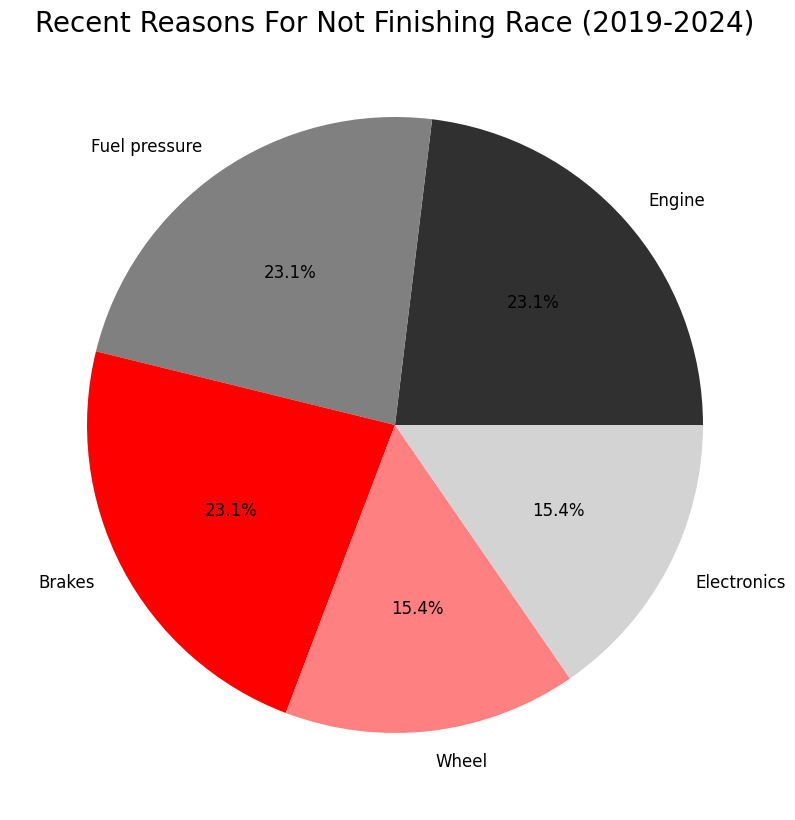

In [ ]:
recent_issues = not_finished['status'].value_counts()
top_recent_issues=recent_issues.head(5)
# Plot the counts as a pie chart
plt.figure(figsize=(10, 10))  # Aspect ratio 1:1 for a circular pie chart
top_recent_issues.plot(kind='pie', fontsize=12, autopct='%1.1f%%', colors=custom_colors)  # Increase font size and display percentage values
plt.title('Recent Reasons For Not Finishing Race (2019-2024)', fontsize=20)  # Increase title font size
plt.ylabel('')  # Remove the y-label
plt.show()

#Engine issues remain, though a lesser percentage
# New issues appears, including electronics, which makes sense with the innovation of F1 cars
# Accidents and collisions do not appear, which could indicate the increase in safety

# **Descriptive Statisics for Top 3 Finishers**

Descriptive statistics for historical top 3 finishers:

In [ ]:
exc_columns = ['number','position', 'driverNumber', 'fastestLapNumber', 'fastestLapRank']
inc_columns = [col for col in hst_finished_top3.columns if col not in exc_columns]

# Describe the DataFrame excluding specific columns
description = hst_finished_top3[inc_columns].describe()
description

,points,grid,laps,dateOfBirth,totalRaceTimeMillis,totalRaceTime,fastestLapTime,fastestLapAvgSpeed
count,107.000000,107.000000,107.000000,107,1.070000e+02,107,107,107.000000
mean,17.355140,3.504673,56.887850,1987-02-15 22:52:42.616822400,5.689489e+06,0 days 00:33:41.378571028,0 days 00:01:32.007775700,212.891822
min,5.000000,1.000000,31.000000,1979-10-17 00:00:00,4.252092e+06,0 days 00:00:00.549000,0 days 00:01:06.145000,189.392000
25%,15.000000,1.000000,56.000000,1981-07-29 00:00:00,5.378956e+06,0 days 00:00:09.659000,0 days 00:01:29.230500,205.696500
50%,18.000000,3.000000,57.000000,1985-01-07 00:00:00,5.534930e+06,0 days 00:00:22.346000,0 days 00:01:32.478000,210.123000
75%,25.000000,4.000000,58.000000,1989-08-28 00:00:00,5.854871e+06,0 days 01:29:54.715000,0 days 00:01:35.819500,220.936000
max,26.000000,22.000000,71.000000,1999-11-13 00:00:00,9.906403e+06,0 days 02:44:51.812000,0 days 00:01:59.732000,242.561000
std,6.045819,3.382457,4.996843,NaN,8.648526e+05,0 days 00:46:04.288834110,0 days 00:00:09.155559146,13.310982


Descriptive Statisitcs for recent top 3 finishers :

In [ ]:
# Describe the DataFrame excluding specific columns highlighted above
desc_recent = recent_finished_top3[inc_columns].describe()
desc_recent

,points,grid,laps,dateOfBirth,totalRaceTimeMillis,totalRaceTime,fastestLapTime,fastestLapAvgSpeed
count,36.000000,36.000000,36.000000,36,3.600000e+01,36,36,36.000000
mean,19.611111,3.055556,58.083333,1992-08-13 12:00:00,5.499344e+06,0 days 00:30:39.958030555,0 days 00:01:27.176833333,222.432028
min,15.000000,1.000000,50.000000,1981-07-29 00:00:00,4.843273e+06,0 days 00:00:00.549000,0 days 00:01:06.145000,202.225000
25%,16.000000,1.000000,54.500000,1989-08-28 00:00:00,5.045565e+06,0 days 00:00:09.280500,0 days 00:01:23.749750,207.128250
50%,18.000000,2.500000,57.000000,1994-09-01 00:00:00,5.482986e+06,0 days 00:00:22.488500,0 days 00:01:31.998000,224.447000
75%,25.000000,4.000000,59.250000,1997-09-30 00:00:00,5.662040e+06,0 days 01:23:12.835500,0 days 00:01:34.063500,236.476500
max,26.000000,15.000000,71.000000,1999-11-13 00:00:00,7.378300e+06,0 days 02:02:34.598000,0 days 00:01:36.344000,242.561000
std,4.244511,2.639745,6.946222,NaN,6.584886e+05,0 days 00:44:04.166152090,0 days 00:00:10.289542715,15.145966


# **Creating a Machine Learning Model for Winner Prediction**

**Note: This step is currently a work in progress. A better model will be created with higher accuracy**

Create a correlation matrix to see the relationship between the variables/features:

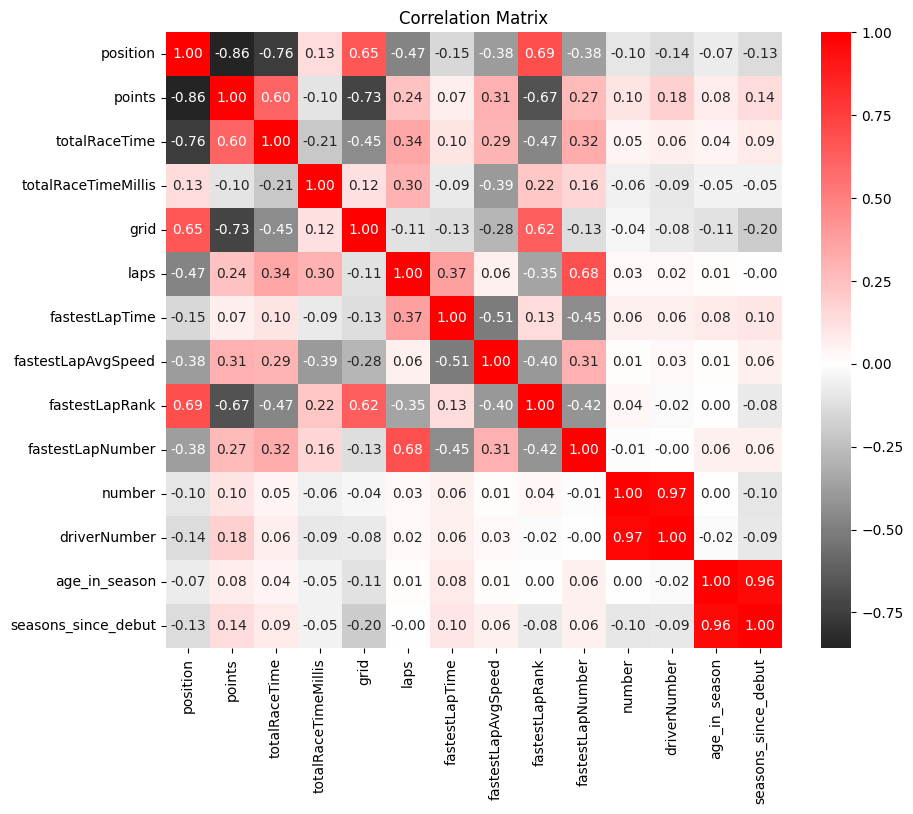

In [ ]:
# Define custom colormap
colors = [(0, 0, 0), (1, 1, 1), (1, 0, 0)]  # black, white, red
custom_cmap = LinearSegmentedColormap.from_list("Custom", colors, N=256)

# Selecting only numeric columns
numeric_data = selected_data.select_dtypes(include='number')

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Creating a heatmap with custom colormap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", square=True, center=0)
plt.title('Correlation Matrix')
plt.show()

With help from the matrix, select the features that you want to predict the winner using chosen method:

Opting to start with a Decision Tree model

In [ ]:
# Feature selection
selected_features = ['totalRaceTimeMillis', 'fastestLapAvgSpeed', 'fastestLapRank', 'seasons_since_debut']
X = recent[selected_features]
y = recent['familyName']  # Target variable

# Drop rows with missing values
recent_cleaned = recent.dropna()

# Selecting the required columns from the cleaned DataFrame
X = recent_cleaned[selected_features]
y = recent_cleaned['familyName']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict winners for the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Display predictions
predictions_df = X_test.copy()
predictions_df['Actual Winner'] = y_test
predictions_df['Predicted Winner'] = y_pred
predictions_df.head(10)

#The model accuracy is at a 25%, this is considerably low
#Will need to consider adding further features or using a different method for prediction

Model Accuracy: 0.25


,totalRaceTimeMillis,fastestLapAvgSpeed,fastestLapRank,seasons_since_debut,Actual Winner,Predicted Winner
83,7380177.0,225.473,6.0,4,Leclerc,Russell
4,5185528.0,219.621,4.0,2,Leclerc,Leclerc
94,5868338.0,201.641,8.0,9,Magnussen,Sainz
81,7376598.0,230.403,1.0,15,Hamilton,Hamilton
24,5697363.0,205.313,4.0,13,Vettel,Pérez
129,5726510.0,200.559,15.0,5,Albon,Tsunoda
116,5115417.0,239.629,5.0,4,Norris,Russell
147,4927726.0,238.424,8.0,8,Ocon,Ocon
61,5524642.0,208.984,2.0,7,Verstappen,Verstappen
25,5707049.0,203.422,12.0,1,Norris,Tsunoda


What does the decision tree process look like?

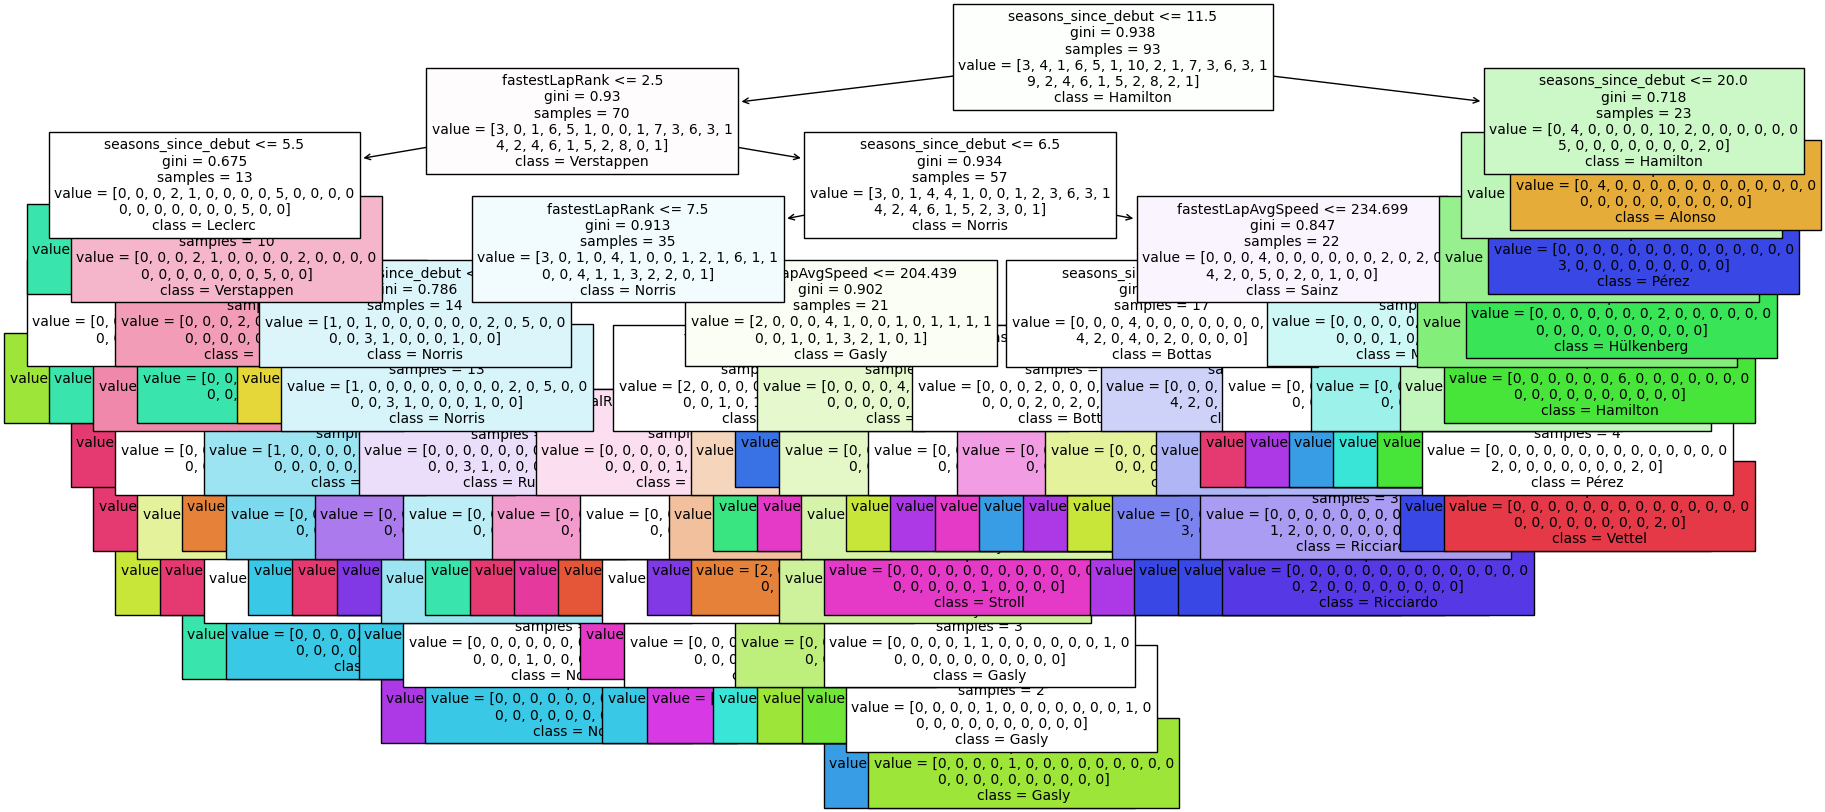

In [ ]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=selected_features, class_names=model.classes_, filled=True, fontsize=10)
plt.show()